In [1]:
# Import EDA packages and load data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
beers = pd.read_csv('beers-breweries-and-beer-reviews/beers.csv')
breweries = pd.read_csv('beers-breweries-and-beer-reviews/breweries.csv')
reviews = pd.read_csv('beers-breweries-and-beer-reviews/reviews.csv')

In [6]:
# Let's look at the reviews!
reviews.shape

(9073128, 10)

In [43]:
# It is interesting that there are reviews that have a final score, but then look/smell/etc
# are NaN. The 'score' feature is derived from the more descriptive features, so it may
# have been an issue with the data collection. I will later drop these entries, as none
# of them have a text review, and the model will end up utilizing the text reviews exclusively
reviews.sample(5)

,beer_id,username,date,text,look,smell,taste,feel,overall,score
892357,63,mothman,2008-09-20,Poured from a brown bottle with no freshnes...,3.5,3.5,3.50,4.0,4.0,3.65
5212578,153887,basaywhat,2018-04-30,16 oz can. Pours a deep amber color with me...,4.0,4.0,4.25,4.0,4.0,4.10
8474345,144074,waddellc2,2015-01-22,,3.5,3.5,3.50,3.5,3.5,3.50
4760453,68425,EROCK83,2012-04-21,,NaN,NaN,NaN,NaN,NaN,4.75
1563008,35732,mikestan06,2011-06-29,Poured from a 12 oz. bottle to my tulip sty...,4.0,3.5,4.50,4.0,4.5,4.18


In [16]:
reviews.username.value_counts()

Sammy                  13798
kylehay2004            12221
acurtis                12016
StonedTrippin          11859
jaydoc                 11800
                       ...  
QuezXLV                    1
ALW42                      1
Hopalong                   1
k0mp0                      1
brytevisuals_studio        1
Name: username, Length: 164934, dtype: int64

Text(0.5, 0, 'Number of reviews by user')

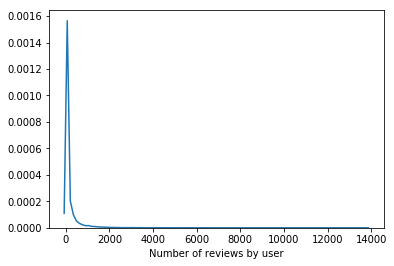

In [44]:
# Distribution plot of users and the number of reviews they have made. Most users have made
# few reviews, and a small portion of them have a large contribution
ax = sns.distplot(reviews.username.value_counts(), hist=False)
ax.set_xlabel('Number of reviews by user')

In [8]:
# Only around ~1800 users have over 1000 reviews
reviews.username.value_counts()[1820:]

Stum-pub           1000
jwinship83         1000
IvoryFoxhole       1000
Greasy             1000
Aaron_Kerkvliet     998
                   ... 
th3hooligan           1
Seymore_Johnson       1
Apolonaire            1
MrsL2011              1
R2luke2               1
Name: username, Length: 163114, dtype: int64

Text(0.5, 0, 'Number of reviews per beer')

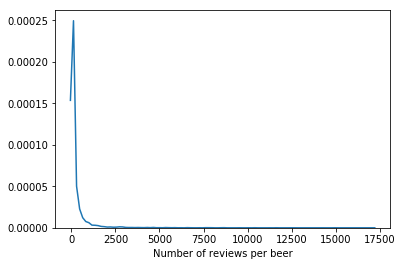

In [48]:
# Now looking at what beers are reviewed, there is a similar trend. 
# Most beers have a small number of reviews, a small number have A LOT
ax = sns.distplot(reviews.beer_id.value_counts(), hist=False)
ax.set_xlabel('Number of reviews per beer')

In [57]:
reviews.beer_id.value_counts()[200000:]

118441    2
63692     2
195668    2
121064    2
358859    2
         ..
203777    1
126326    1
109950    1
282050    1
8188      1
Name: beer_id, Length: 109542, dtype: int64

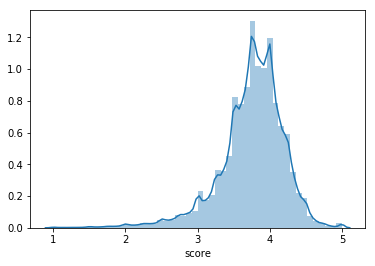

In [14]:
# Below is a distribution of the aveage rating for each beer. Normal-ish! 
sns.distplot(reviews.groupby(['beer_id']).score.mean())

In [28]:
reviews.score.mean()

3.8898151232959632

In [22]:
# What is the distribution of reviews over the total timespan of 1998-2017?
reviews['date']= pd.to_datetime(reviews['date']) 
dt_reviews = reviews.set_index('date')
early_reviews = dt_reviews[dt_reviews.index.year < 2010]
sns.distplot(early_reviews.groupby(['beer_id']).score.mean())

In [21]:
# Less than 900k are from before 2010
dt_reviews[dt_reviews.index.year < 2010]

,beer_id,username,text,look,smell,taste,feel,overall,score
date,,,,,,,,,
2009-08-17,58482,Imstillthegman,This one pours a cloudy rusty orange with a...,4.0,3.5,4.0,4.0,4.5,3.98
2009-08-17,58482,Kadonny,Poured from a bottle into a Duvel tulip gla...,4.0,4.0,4.0,4.0,4.5,4.10
2009-08-17,58482,Sammy,On-tap at Mr. Goodbar's. Some yeast aroma. ...,3.5,4.0,3.0,3.5,3.5,3.42
2009-08-17,58482,Lexluthor33,"A hazy,golden color with a really nice look...",4.0,3.5,4.0,4.0,4.0,3.88
2009-08-16,58482,jamie2dope,"Here we go again, another brew from Weyerba...",3.5,3.5,4.0,4.0,4.0,3.85
...,...,...,...,...,...,...,...,...,...
2009-08-24,58482,beerthulhu,A: Poured a pumpkin pie orange with gold hi...,4.0,3.0,4.0,3.5,3.5,3.61
2009-08-24,58482,Billolick,"On tap pours semi cloudy yellowy amber, it ...",4.0,3.5,4.0,4.0,3.5,3.78
2009-08-22,58482,smcolw,Large chalky white head. Leaves lots of spo...,4.0,3.5,3.5,4.0,3.5,3.58


In [25]:
early_reviews = dt_reviews[dt_reviews.index.year < 2010]

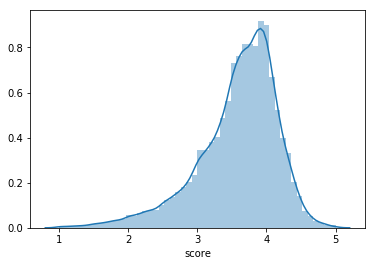

In [26]:
sns.distplot(early_reviews.groupby(['beer_id']).score.mean())

In [27]:
# the mean reduced by ~0.1 overall score. So not that much different
early_reviews.score.mean()

3.763992311409322

In [35]:
# Create a dataframe with average score for each beer, and the number of reviews it has
ratings = pd.DataFrame(reviews.groupby('beer_id')['score'].mean())
ratings = ratings.rename(columns={'score':'avg_score'})
ratings['no_of_ratings'] = reviews.groupby('beer_id')['score'].count()
reviews_w_avg = reviews.merge(ratings, how='inner', on='beer_id')

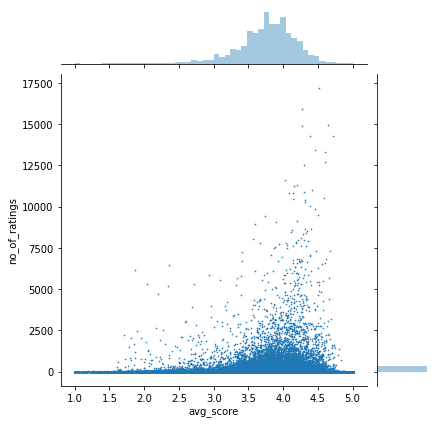

In [62]:
sns.jointplot(x='avg_score', y='no_of_ratings', data = ratings, s=0.4)

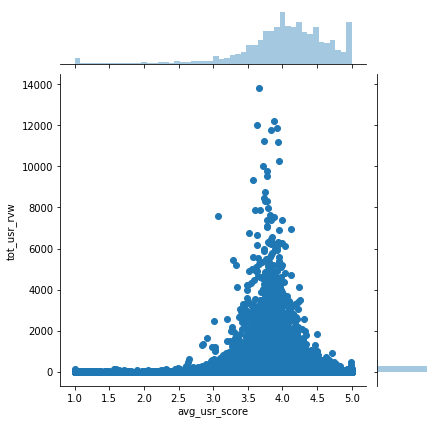

In [40]:
# Create a similar DF as above, but for each user. Number of beers they have reviews, and 
# their average score. Then plot the relationship
reviewers = pd.DataFrame(reviews.groupby('username')['beer_id'].count())
reviewers = reviewers.rename(columns={'beer_id':'tot_usr_rvw'})
reviewers['avg_usr_score'] = reviews.groupby('username')['score'].mean()
sns.jointplot(x='avg_usr_score', y='tot_usr_rvw', data = reviewers, kind='hex')

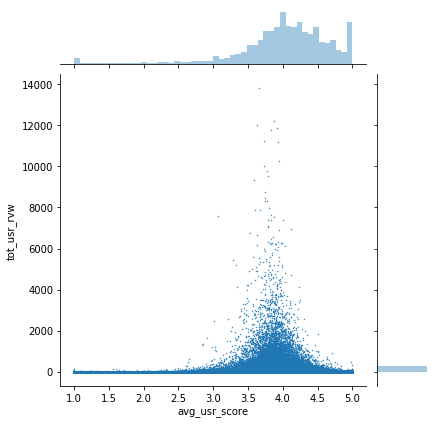

In [61]:
sns.jointplot(x='avg_usr_score', y='tot_usr_rvw', data = reviewers, s=0.2)

In [59]:
reviewers['avg_usr_score'].mean()

4.034023637346255

In [73]:
reviewers.loc[(reviewers['avg_usr_score'] < 2)&(reviewers['tot_usr_rvw'] > 1)]

,tot_usr_rvw,avg_usr_score
username,,
253BadHabit,2,1.000
2shanes,2,1.750
3006630,2,1.860
3bthero,2,1.000
4guitars,2,1.875
...,...,...
wonderdave,2,1.610
wraith420,3,1.000
wtgannon,9,1.000


In [74]:
reviews.loc[reviews.username == 'wtgannon']

,beer_id,username,date,text,look,smell,taste,feel,overall,score
871463,34,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
988627,88,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
1401624,248,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
1992269,656,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
2180728,751,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
2574398,1054,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
3302244,1629,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
3435300,38180,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0
5689756,10221,wtgannon,2012-08-04,,NaN,NaN,NaN,NaN,NaN,1.0


In [79]:
beers.loc[beers.id == 1054]

,id,name,brewery_id,state,country,style,availability,abv,notes,retired
50136,1054,Trippel,192,CO,US,Belgian Tripel,Year-round,8.5,"Our Trippel has always been a big, beautiful B...",f


In [77]:
reviews.loc[reviews.beer_id == 10221]

,beer_id,username,date,text,look,smell,taste,feel,overall,score
5689652,10221,Hellpop65,2014-12-26,,3.25,3.25,3.0,3.25,3.0,3.10
5689653,10221,BigGold,2014-03-26,,NaN,NaN,NaN,NaN,NaN,3.75
5689654,10221,mendvicdog,2013-10-15,,NaN,NaN,NaN,NaN,NaN,3.25
5689655,10221,tgatort,2013-10-11,,NaN,NaN,NaN,NaN,NaN,3.75
5689656,10221,magnusdave,2013-09-22,,NaN,NaN,NaN,NaN,NaN,4.00
...,...,...,...,...,...,...,...,...,...,...
5689873,10221,Ave,2003-10-20,so i killed a growler of this single handed...,4.00,3.50,4.5,4.50,5.0,4.33
5689874,10221,AtLagerHeads,2003-09-19,"Another strong Schlafly brew, the APA is ni...",4.00,4.00,4.0,3.50,4.0,3.95
5689875,10221,maxpower,2003-08-23,"Cloudy and hazy amber-copper in color, thic...",4.50,4.50,4.5,4.50,4.5,4.50
5689876,10221,Ahhdball,2003-08-07,Maybe I got the last of an old batch or my ...,3.50,3.50,3.5,3.00,3.0,3.35
